*********************************************
COMBI REDUCER with Planetary & Harmonic Drive
*********************************************
******* Harmonic Drive *******
Gear Module = 0.3
Reduction Ratio = -36.0
Pitch Radius of Circular Spline = 22.2mm
Tooth Number of Circular Spline = 148mm
Pitch Radius of Flex Spline = 21.599999999999998mm
Tooth Number of Flex Spline = 144mm
Radius Deformation of Flex Spline to 1st direction = 0.6mm
Radius Deformation of Flex Spline to 2nd direction = 0.608452800758235mm
EVALUATION : OK.
 
******* Planetary Drive *******
Gear Module = 0.3
Reduction Ratio = 5.466666666666666
Pitch Radius of Ring Gear = 20.099999999999998mm
Tooth Number of Ring Gear = 134mm
Radius Deformation of Ring Gear to 1st direction = 0.6mm
Radius Deformation of Ring Gear to 2nd direction = 0.609093519321138mm
Pitch Radius of Sun Gear = 4.5mm
Tooth Number of Sun Gear = 30
Pitch Radius of Planet Gear = 8.1mm
Tooth Number of Planet Gear = 54.0
EVALUATION : This is not correct parame

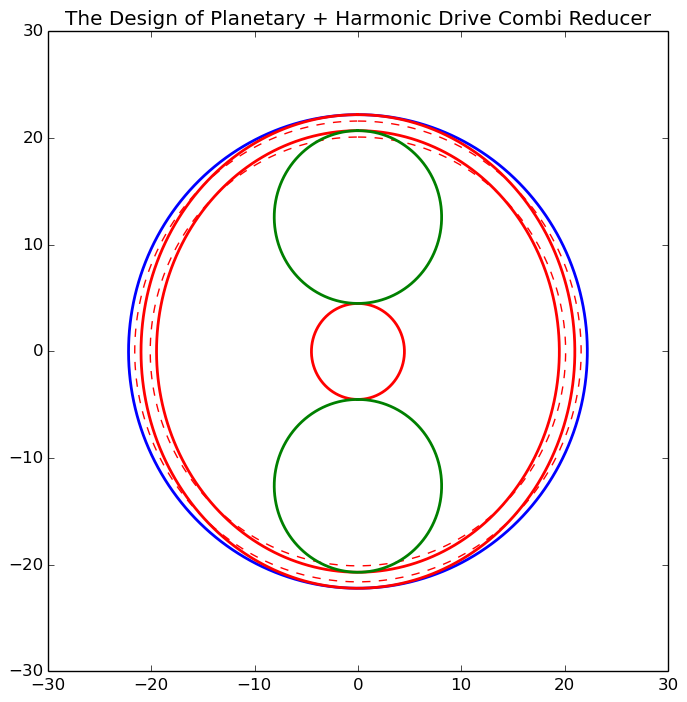

In [2]:
# # 유성기어-하모닉드라이브 콤비감속기 설계용 스크립트
# MATLAB m파일을 JULIA jl파일로 컨버젼한 것
# 2015.05.14
# 김동호
#######################################################
 
using PyPlot
#using Gadfly
#using Winston
 
#######################################################
 
# 하모닉드라이브의 모듈과 잇수를 결정해 주면 사양을 산출하는 스크립트
 
m_hd=0.3; #기어모듈
n_hd=148; #기본원호반지름의 기어 잇수
fa_hd=.6; #장축으로 늘어난 길이(반지름)
r_hd=m_hd*n_hd/2-fa_hd; #원의 반지름
n_minus_hd=4; #줄이려는 기어 잇수
# r값이 m의 배수로 합당한 값인지 판별한다.
r_hd_eval=(n_hd-n_minus_hd)-(2*r_hd/m_hd); #이 값이 0이면 성공.  fa값을 조절하여 반복적으로 맞춘다.
ratio_hd=(n_hd-n_minus_hd)/((n_hd-n_minus_hd)-n_hd);
 
# 단축으로 줄어든 길이 산출(반지름)
fb1_hd=(2/5)*((2*r_hd+(3/2)*fa_hd)+sqrt((2*r_hd+(3/2)*fa_hd)^2-5*((5/4)*fa_hd^2+2*fa_hd*r_hd)));
fb2_hd=(2/5)*((2*r_hd+(3/2)*fa_hd)-sqrt((2*r_hd+(3/2)*fa_hd)^2-5*((5/4)*fa_hd^2+2*fa_hd*r_hd)));
 
# 원둘레와 타원둘레 길이 비교
circle_hd=2*pi*r_hd;
ellipse_hd=pi*((5/4)*(2*r_hd+fa_hd-fb2_hd)-(r_hd+fa_hd)*(r_hd-fb2_hd)/(2*r_hd+fa_hd-fb2_hd));
error_hd=circle_hd-ellipse_hd;
 
# 플랏
alpha=[0:0.01:2*pi];
figure(figsize=(8,8))
plot(r_hd*sin(alpha),r_hd*cos(alpha),color="red",linewidth=1,linestyle="--");
plot((r_hd+fa_hd)*sin(alpha),(r_hd+fa_hd)*cos(alpha),color="blue",linewidth=2);
plot((r_hd-fb2_hd)*sin(alpha),(r_hd+fa_hd)*cos(alpha),color="red",linewidth=2);
title("The Design of Planetary + Harmonic Drive Combi Reducer");
 
#######################################################
 
# 적절한 살두께를 고려하여 내부 웨이브제네레이터용 유성기어의 내접기어를 산출하는 스크립트
 
m_wg=m_hd*1; #웨이브제네레이터 기어모듈 (하모닉드라이브의 기어모듈과 정수배율 관계인 것이 좋음)
n_wg=134; #웨이브제네레이터 내접기어잇수
fa_wg=fa_hd;
r_wg=m_wg*n_wg/2 #-fa_wg; #웨이브제네레이터 내접기어 피치원의 반지름
 
# 단축으로 줄어든 길이 산출(반지름)
fb1_wg=(2/5)*((2*r_wg+(3/2)*fa_wg)+sqrt((2*r_wg+(3/2)*fa_wg)^2-5*((5/4)*fa_wg^2+2*fa_wg*r_wg)));
fb2_wg=(2/5)*((2*r_wg+(3/2)*fa_wg)-sqrt((2*r_wg+(3/2)*fa_wg)^2-5*((5/4)*fa_wg^2+2*fa_wg*r_wg)));
 
# 플랏
plot(r_wg*sin(alpha),r_wg*cos(alpha),color="red",linewidth=1,linestyle="--");
plot((r_wg-fb2_wg)*sin(alpha),(r_wg+fa_wg)*cos(alpha),color="red",linewidth=2);
 
 
# 유성기어 산출
r_p=r_wg+fa_wg; #유성기어의 가상 링기어 피치원 반지름
n_sun=30; #원하는 썬기어의 기어잇수
r_sun=(n_sun*m_wg)/2; #썬기어의 반지름
r_planet=(r_p-r_sun)/2; #플래닛기어의 반지름
 
ratio_p=(r_wg/r_sun)+1; #유성기어의 감속비율 산출
 
# n_sun 값이 합당한 값인지 판별한다.
r_planet_eval=r_planet/m_wg; #정수로 떨어지면 OK
 
# 플랏
plot(r_sun*sin(alpha),r_sun*cos(alpha),color="red",linewidth=2);
plot(r_planet*sin(alpha),r_planet*cos(alpha)+(r_sun+r_planet),color="green",linewidth=2);
plot(r_planet*sin(alpha),r_planet*cos(alpha)-(r_sun+r_planet),color="green",linewidth=2);
 
 
#######################################################
 
# 설계 결과값 출력
println("*********************************************");
println("COMBI REDUCER with Planetary & Harmonic Drive");
println("*********************************************");
 
r_cs=r_hd+fa_hd;
n_fs=n_hd-n_minus_hd;
println("******* Harmonic Drive *******");
println("Gear Module = ",m_hd);
println("Reduction Ratio = ",ratio_hd);
println("Pitch Radius of Circular Spline = ",r_cs,"mm");
println("Tooth Number of Circular Spline = ",n_hd,"mm");
println("Pitch Radius of Flex Spline = ",r_hd,"mm");
println("Tooth Number of Flex Spline = ",n_fs,"mm");
println("Radius Deformation of Flex Spline to 1st direction = ",fa_hd,"mm");
println("Radius Deformation of Flex Spline to 2nd direction = ",fb2_hd,"mm");
if r_hd_eval==0
    println("EVALUATION : OK.");
elseif r_hd_eval != 0
    println("EVALUATION : FAIL --> fa_hd=",fa_hd, "r_hd_eval=",r_hd_eval);
end
 
println(" ");
println("******* Planetary Drive *******");
println("Gear Module = ",m_wg);
println("Reduction Ratio = ",ratio_p);
println("Pitch Radius of Ring Gear = ",r_wg,"mm");
println("Tooth Number of Ring Gear = ",n_wg,"mm");
println("Radius Deformation of Ring Gear to 1st direction = ",fa_wg,"mm");
println("Radius Deformation of Ring Gear to 2nd direction = ",fb2_wg,"mm");
println("Pitch Radius of Sun Gear = ",r_sun,"mm");
println("Tooth Number of Sun Gear = ",n_sun);
println("Pitch Radius of Planet Gear = ",r_planet,"mm");
println("Tooth Number of Planet Gear = ",2*r_planet_eval);
if rem(r_planet,m_wg) == 0
    println("EVALUATION : OK.");
elseif rem(r_planet,m_wg) != 0
    println("EVALUATION : This is not correct parameters. Check n_sun.");
end
 
println(" ");
println("******* Combination *******");
println("Total Reduction Ratio = ",ratio_p*ratio_hd);
println("Plastic Thickness of Flex Spline = ",r_hd-r_wg);
 
println(" ");
println("Thank you.");

Slider{Float64}([Input{Float64}] 0.3,"m_hd",0.3,0.1:0.1:0.6)

Slider{Int64}([Input{Int64}] 148,"n_hd",148,1:1:296)

Slider{Float64}([Input{Float64}] 0.6,"fa_hd",0.6,0.1:0.1:1.2)

Slider{Int64}([Input{Int64}] 4,"n_minus_hd",4,1:1:8)

Slider{Int64}([Input{Int64}] 134,"n_wg",134,1:1:268)

Slider{Int64}([Input{Int64}] 50,"n_sun",50,1:1:100)

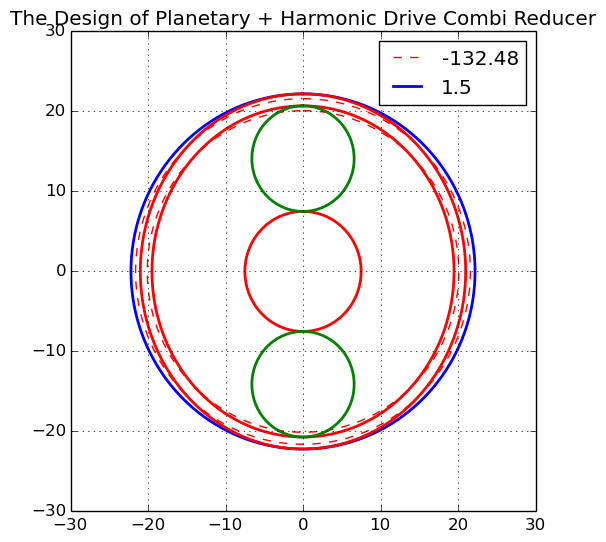

In [2]:
# COMBI REDUCER with Planetary & Harmonic Drive
# V03
# 2015.05.15
# 김동호
#######################################################
 
using PyPlot
#using Gadfly
#using Winston
using Interact
 
#######################################################
 
# 하모닉드라이브의 모듈과 잇수를 결정해 주면 사양을 산출하는 스크립트

# 매개변수
alpha=[0:0.01:2*pi];

f=figure(figsize=(6,6))
@manipulate for m_hd=0.1:0.1:0.6, #기어모듈
                n_hd=1:1:296, #기본원호반지름의 기어 잇수
                fa_hd=0.1:.1:1.2, #장축으로 늘어난 길이(반지름)
                n_minus_hd=1:1:8, #줄이려는 기어 잇수
                n_wg=1:1:268, #웨이브제네레이터 내접기어잇수
                n_sun=1:1:100 #원하는 썬기어의 기어잇수
    
    withfig(f) do
        r_hd=m_hd*n_hd/2-fa_hd; #원의 반지름
        
        # r값이 m의 배수로 합당한 값인지 판별한다.
        r_hd_eval=(n_hd-n_minus_hd)-(2*r_hd/m_hd); #이 값이 0이면 성공.  fa값을 조절하여 반복적으로 맞춘다.
        ratio_hd=(n_hd-n_minus_hd)/((n_hd-n_minus_hd)-n_hd);
        # 단축으로 줄어든 길이 산출(반지름)
        fb1_hd=(2/5)*((2*r_hd+(3/2)*fa_hd)+sqrt((2*r_hd+(3/2)*fa_hd)^2-5*((5/4)*fa_hd^2+2*fa_hd*r_hd)));
        fb2_hd=(2/5)*((2*r_hd+(3/2)*fa_hd)-sqrt((2*r_hd+(3/2)*fa_hd)^2-5*((5/4)*fa_hd^2+2*fa_hd*r_hd)));
        # 원둘레와 타원둘레 길이 비교
        circle_hd=2*pi*r_hd;
        ellipse_hd=pi*((5/4)*(2*r_hd+fa_hd-fb2_hd)-(r_hd+fa_hd)*(r_hd-fb2_hd)/(2*r_hd+fa_hd-fb2_hd));
        error_hd=circle_hd-ellipse_hd;
        # 플랏
        grid(true)
        plot(r_hd*sin(alpha),r_hd*cos(alpha),color="red",linewidth=1,linestyle="--");
        plot((r_hd+fa_hd)*sin(alpha),(r_hd+fa_hd)*cos(alpha),color="blue",linewidth=2);
        plot((r_hd-fb2_hd)*sin(alpha),(r_hd+fa_hd)*cos(alpha),color="red",linewidth=2);
        title("The Design of Planetary + Harmonic Drive Combi Reducer");
 
        #######################################################
        # 적절한 살두께를 고려하여 내부 웨이브제네레이터용 유성기어의 내접기어를 산출하는 스크립트
        m_wg=m_hd*1; #웨이브제네레이터 기어모듈 (하모닉드라이브의 기어모듈과 정수배율 관계인 것이 좋음)
        fa_wg=fa_hd;
        r_wg=m_wg*n_wg/2 #-fa_wg; #웨이브제네레이터 내접기어 피치원의 반지름
        # 단축으로 줄어든 길이 산출(반지름)
        fb1_wg=(2/5)*((2*r_wg+(3/2)*fa_wg)+sqrt((2*r_wg+(3/2)*fa_wg)^2-5*((5/4)*fa_wg^2+2*fa_wg*r_wg)));
        fb2_wg=(2/5)*((2*r_wg+(3/2)*fa_wg)-sqrt((2*r_wg+(3/2)*fa_wg)^2-5*((5/4)*fa_wg^2+2*fa_wg*r_wg)));
        # 플랏
        plot(r_wg*sin(alpha),r_wg*cos(alpha),color="red",linewidth=1,linestyle="--");
        plot((r_wg-fb2_wg)*sin(alpha),(r_wg+fa_wg)*cos(alpha),color="red",linewidth=2);
        # 유성기어 산출
        r_p=r_wg+fa_wg; #유성기어의 가상 링기어 피치원 반지름
        r_sun=(n_sun*m_wg)/2; #썬기어의 반지름
        r_planet=(r_p-r_sun)/2; #플래닛기어의 반지름
        ratio_p=(r_wg/r_sun)+1; #유성기어의 감속비율 산출
        # n_sun 값이 합당한 값인지 판별한다.
        r_planet_eval=r_planet/m_wg; #정수로 떨어지면 OK
        # 플랏
        plot(r_sun*sin(alpha),r_sun*cos(alpha),color="red",linewidth=2);
        plot(r_planet*sin(alpha),r_planet*cos(alpha)+(r_sun+r_planet),color="green",linewidth=2);
        plot(r_planet*sin(alpha),r_planet*cos(alpha)-(r_sun+r_planet),color="green",linewidth=2);
        
        legend([ratio_p*ratio_hd, r_hd-r_wg])
        
        #######################################################
        # 설계 결과값 출력
        #println("*********************************************");
        #println("COMBI REDUCER with Planetary & Harmonic Drive");
        #println("*********************************************");
        #r_cs=r_hd+fa_hd;
        #n_fs=n_hd-n_minus_hd;
        #println("******* Harmonic Drive *******");
        #println("Gear Module = ",m_hd);
        #println("Reduction Ratio = ",ratio_hd);
        #println("Pitch Radius of Circular Spline = ",r_cs,"mm");
        #println("Tooth Number of Circular Spline = ",n_hd,"mm");
        #println("Pitch Radius of Flex Spline = ",r_hd,"mm");
        #println("Tooth Number of Flex Spline = ",n_fs,"mm");
        #println("Radius Deformation of Flex Spline to 1st direction = ",fa_hd,"mm");
        #println("Radius Deformation of Flex Spline to 2nd direction = ",fb2_hd,"mm");
        #if r_hd_eval==0
        #    println("EVALUATION : OK.");
        #    elseif r_hd_eval != 0
        #    println("EVALUATION : FAIL --> fa_hd=",fa_hd, "r_hd_eval=",r_hd_eval);
        #end
        #println(" ");
        #println("******* Planetary Drive *******");
        #println("Gear Module = ",m_wg);
        #println("Reduction Ratio = ",ratio_p);
        #println("Pitch Radius of Ring Gear = ",r_wg,"mm");
        #println("Tooth Number of Ring Gear = ",n_wg,"mm");
        #println("Radius Deformation of Ring Gear to 1st direction = ",fa_wg,"mm");
        #println("Radius Deformation of Ring Gear to 2nd direction = ",fb2_wg,"mm");
        #println("Pitch Radius of Sun Gear = ",r_sun,"mm");
        #println("Tooth Number of Sun Gear = ",n_sun);
        #println("Pitch Radius of Planet Gear = ",r_planet,"mm");
        #println("Tooth Number of Planet Gear = ",2*r_planet_eval);
        #if rem(r_planet,m_wg) == 0
        #    println("EVALUATION : OK.");
        #    elseif rem(r_planet,m_wg) != 0
        #    println("EVALUATION : This is not correct parameters. Check n_sun.");
        #end
        #println(" ");
        #println("******* Combination *******");
        #println("Total Reduction Ratio = ",ratio_p*ratio_hd);
        #println("Plastic Thickness of Flex Spline = ",r_hd-r_wg);
        #println(" ");
        #println("Thank you.");
    end
end


Slider{Float64}([Input{Float64}] 1.0,"m",1.0,0.1:0.1:2.0)

Slider{Int64}([Input{Int64}] 175,"n_cs",175,50:1:300)

Slider{Int64}([Input{Int64}] 10,"dn_fs",10,1:1:20)

Slider{Int64}([Input{Int64}] 10,"dn_ig",10,1:1:20)

Slider{Int64}([Input{Int64}] 130,"dn_sg",130,1:1:260)

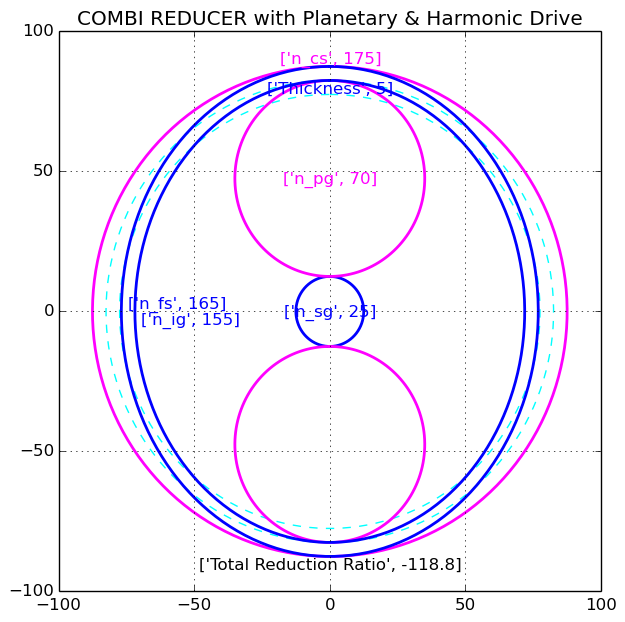

In [37]:
#######################################################
# COMBI REDUCER with Planetary & Harmonic Drive
# V04
# 2015.05.17
# Dymaxion.kim
#######################################################
 
#using PyPlot
using Gadfly
#using Winston
using Interact
 
# Basic Parameter
alpha=[0:0.02:2*pi]
max_n_cs = 300
max_dn_fs = 20
max_dn_ig = 20
max_dn_sg = max_n_cs - max_dn_fs - max_dn_ig
# Making New Figure
f=figure(figsize=(7,7))
# Interact Macro
@manipulate for m = 0.1:0.1:2, # Module of The Gear
    n_cs = 50:1:max_n_cs, # Number of Teeth for Circular Spline
    dn_fs = 1:1:max_dn_fs, # Different Number of Teeth for Flex Spline
    dn_ig = 1:1:max_dn_ig, # Different Number of Teeth for Internal Gear
    dn_sg = 1:1:max_dn_sg # Different Number of Teeth for Sun Gear
    
    withfig(f) do
        grid("on")
        axis("auto")
        title("COMBI REDUCER with Planetary & Harmonic Drive")
        
        # Draw Circular Spline
        r_cs = m*n_cs/2
        plot( r_cs*sin(alpha), r_cs*cos(alpha), linewidth=2, color="Magenta" )
        annotate(["n_cs",int(n_cs)],xy=(0,r_cs),ha="center",va="bottom", color="magenta")
        
        # Draw Flex Spline in Idle Status
        r_fs = m*(n_cs-dn_fs)/2
        plot( r_fs*sin(alpha), r_fs*cos(alpha), linestyle="--", color="cyan" )

        # Draw Internal Gear in Idle Status
        r_ig = m*(n_cs-dn_fs-dn_ig)/2
        plot( r_ig*sin(alpha), r_ig*cos(alpha), linestyle="--", color="cyan" )
        
        # Draw Sun Gear
        r_sg = m*(n_cs-dn_fs-dn_ig-dn_sg)/2
        n_sg = 2*r_sg/m
        if r_sg > 0
            plot( r_sg*sin(alpha), r_sg*cos(alpha), linewidth=2, color="blue" )
            annotate(["n_sg",int(n_sg)],xy=(0,0),ha="center",va="center", color="blue")
        else
            plot( r_sg*sin(alpha), r_sg*cos(alpha), linewidth=4, linestyle="--", color="red" )
            annotate(["n_sg is in minus",int(n_sg)],xy=(0,0),ha="center",va="center", color="red")
        end
        
        # Draw Planet Gears
        t_fs = r_fs-r_ig # Thickness of Flex Spline's Plastic
        r_pg = (r_cs-t_fs-r_sg)/2
        plot( r_pg*sin(alpha), r_pg*cos(alpha)+(r_sg+r_pg), linewidth=2, color="magenta" )
        plot( r_pg*sin(alpha), r_pg*cos(alpha)-(r_sg+r_pg), linewidth=2, color="magenta" )
        n_pg = 2*r_pg/m
        annotate(["n_pg",int(n_pg)],xy=(0,r_sg+r_pg),ha="center",va="center", color="magenta")
        annotate(["Thickness",int(t_fs)],xy=(0,r_sg+2*r_pg),ha="center",va="top", color="blue")
        
        # Draw Flex Spline in assembled
        L_fs = 2*pi*r_fs
        Dl_fs = 2*r_cs
        Ds_fs = sqrt(-3*Dl_fs^2 + 4*L_fs*Dl_fs/pi)
        plot( (Ds_fs/2)*sin(alpha), (Dl_fs/2)*cos(alpha), linewidth=2, color="blue" )
        n_fs = 2*r_fs/m
        annotate(["n_fs",int(n_fs)],xy=(-0.9*r_fs,0),ha="left",va="bottom", color="blue")

        # Draw Internal Gear in assembled
        L_ig = 2*pi*r_ig
        Dl_ig = Dl_fs - 2*t_fs
        #Ds_ig = sqrt(-3*Dl_ig^2 + 4*L_ig*Dl_ig/pi)
        Ds_ig = Ds_fs - 2*t_fs
        plot( (Ds_ig/2)*sin(alpha), (Dl_ig/2)*cos(alpha), linewidth=2, color="blue" )
        n_ig = 2*r_ig/m
        annotate(["n_ig",int(n_ig)],xy=(-0.9*r_ig,0),ha="left",va="top",color="blue")
        
        # Reduction Ratio
        RRp = (n_sg+n_ig)/n_sg
        RRh = n_fs/(n_fs-n_cs)
        RRt = RRp * RRh
        annotate(["Total Reduction Ratio",RRt],xy=(0,-r_cs),ha="center",va="top", color="black")

    end
end
